In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('df_flights_weather.csv') # Flights sample import

In [3]:
df_p=pd.read_csv('passengers_sample.csv') #Passengers sample import

In [4]:
df_fc=pd.read_csv('fuel_consumption.csv') #Fuel consumption import

In [5]:
#Total passengers grouped by origin, dest, and carrier
df_p_mean=df_p[['unique_carrier','origin','dest','passengers']].groupby(['origin','dest','unique_carrier'],as_index=False).mean()

In [6]:
#Total fuel cost and gallons grouped by carrier
df_fc_mean=df_fc[['unique_carrier','total_gallons','total_cost']].groupby('unique_carrier',as_index=False).mean()


In [7]:
df_fc_mean.rename(columns={'unique_carrier':'op_unique_carrier'},inplace=True) #rename cols for merge
df_p_mean.rename(columns={'unique_carrier':'mkt_unique_carrier'},inplace=True)


In [8]:
df_f_p=pd.merge(left=df,right=df_p_mean,how='left',on=['mkt_unique_carrier','origin','dest'],) # Merge flights with passengers

In [9]:
#MErge flights_passengers with fuel consumption
df_f_p_fc=pd.merge(left=df_f_p,right=df_fc_mean,how='left',on='op_unique_carrier')

In [ ]:
df_f_p_fc.dtypes

In [ ]:
df_f_p_fc.columns

In [10]:
df_f_p_fc.drop(columns=['Unnamed: 0', 'Unnamed: 0_x','branded_code_share', 'mkt_carrier','tail_num','origin_airport_id',\
                        'origin_city_name', 'dest_airport_id','dest_city_name','no_name','crs_dep_time_rounded',\
                        'formatted_datetime','origin_city_name_formatted', 'Unnamed: 0_y'],inplace=True)

In [ ]:
df_f_p_fc.columns

In [11]:
#Read flights_test with weather data
df_test=pd.read_csv('df_flights_test_with_weather_rev1.csv')

In [59]:
df_test.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'fl_date', 'mkt_unique_carrier',
       'branded_code_share', 'mkt_carrier', 'mkt_carrier_fl_num',
       'op_unique_carrier', 'tail_num', 'op_carrier_fl_num',
       'origin_airport_id', 'origin', 'origin_city_name', 'dest_airport_id',
       'dest', 'dest_city_name', 'crs_dep_time', 'crs_arr_time', 'dup',
       'crs_elapsed_time', 'flights', 'distance', 'crs_dep_time_rounded',
       'origin_city_name_formatted', 'formatted_datetime', 'Unnamed: 0_y',
       'tempC', 'HeatIndexC', 'DewPointC', 'WindChillC', 'windspeedMiles',
       'WindGustMiles', 'weatherCode', 'precipMM', 'humidity', 'visibility',
       'cloudcover'],
      dtype='object')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
features=['dep_delay', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in','arr_delay',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'tempC', 'HeatIndexC', 'DewPointC', 'WindChillC',
       'windspeedMiles', 'WindGustMiles', 'weatherCode', 'precipMM',
       'humidity', 'visibility', 'cloudcover', 'passengers', 'total_gallons',
       'total_cost']

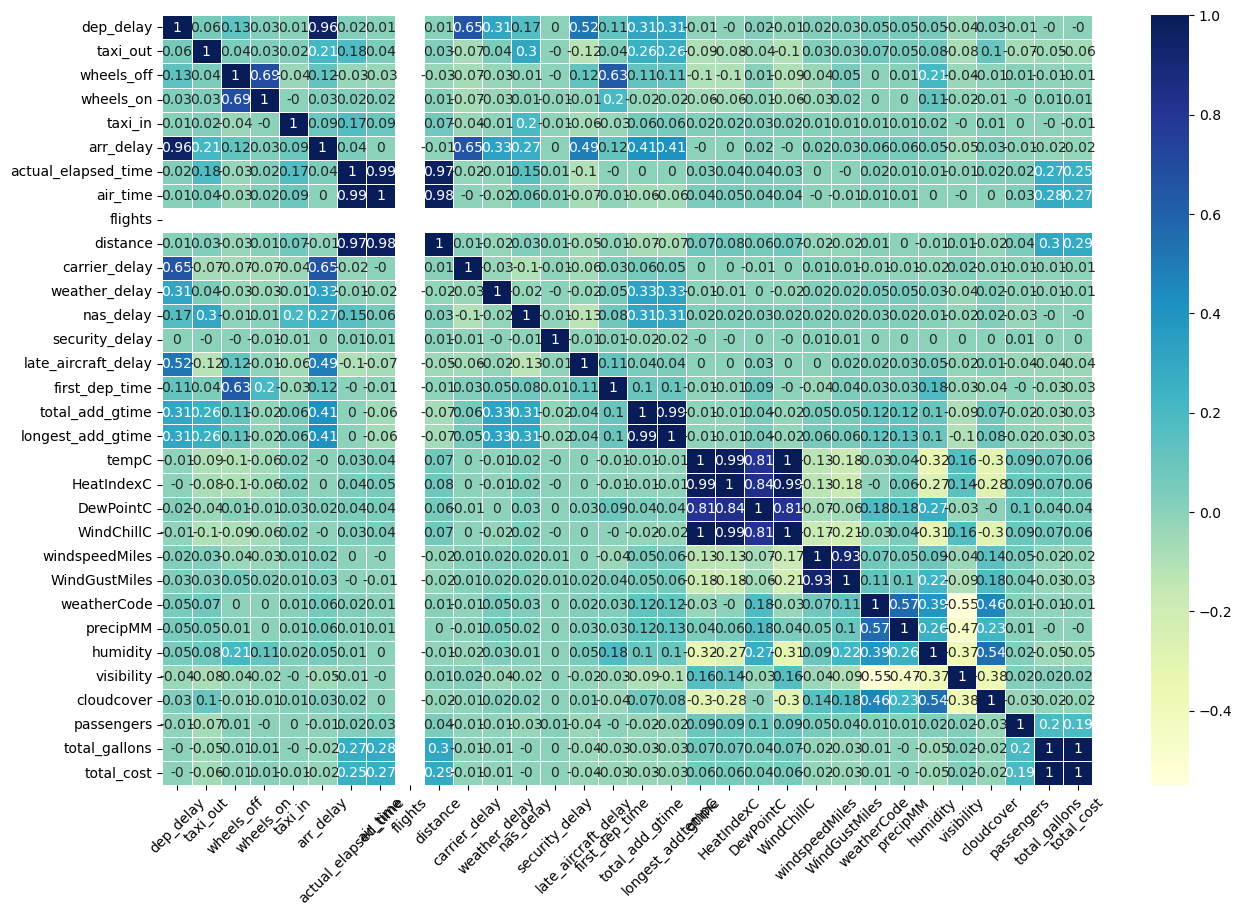

In [14]:

plt.figure(figsize=(15,10))
sns.heatmap(df_f_p_fc[features].corr().round(2),
            linewidths=0.5,cbar=True,cmap='YlGnBu',annot=True)
plt.xticks(rotation=45)
plt.show()

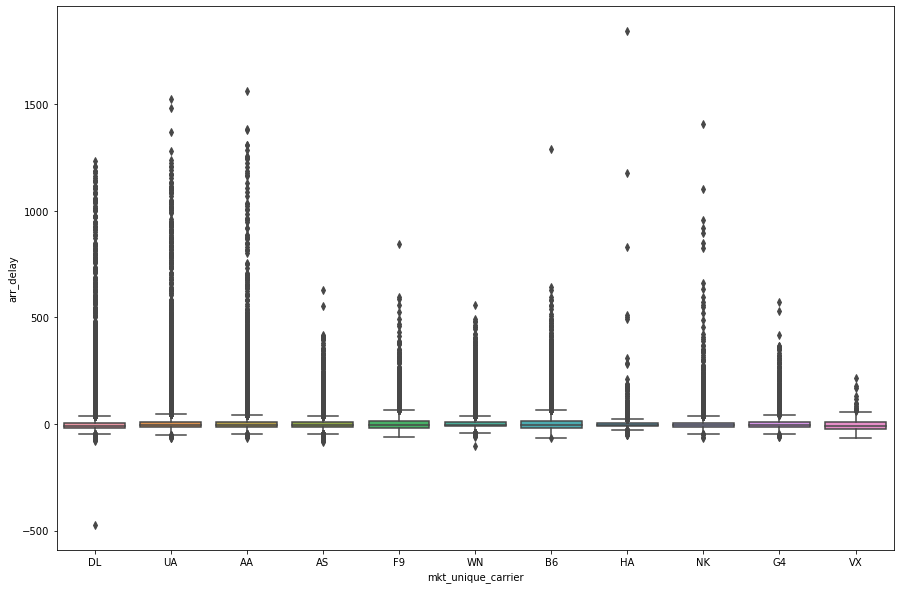

In [15]:
%matplotlib inline
var = 'mkt_unique_carrier'
data = df_f_p_fc[['arr_delay',var]]
f, ax = plt.subplots(figsize=(15, 10))
fig = sns.boxplot(x=var, y="arr_delay", data=data)
#fig.axis(ymin=0, ymax=800000)

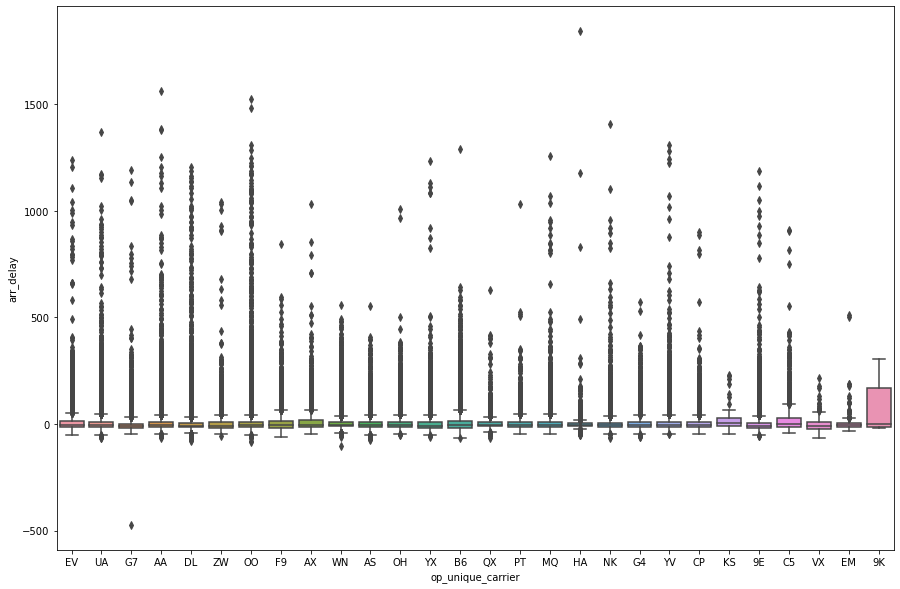

In [16]:
%matplotlib inline
var = 'op_unique_carrier'
data = df_f_p_fc[['arr_delay',var]]
f, ax = plt.subplots(figsize=(15, 10))
fig = sns.boxplot(x=var, y="arr_delay", data=data)
#fig.axis(ymin=0, ymax=800000)

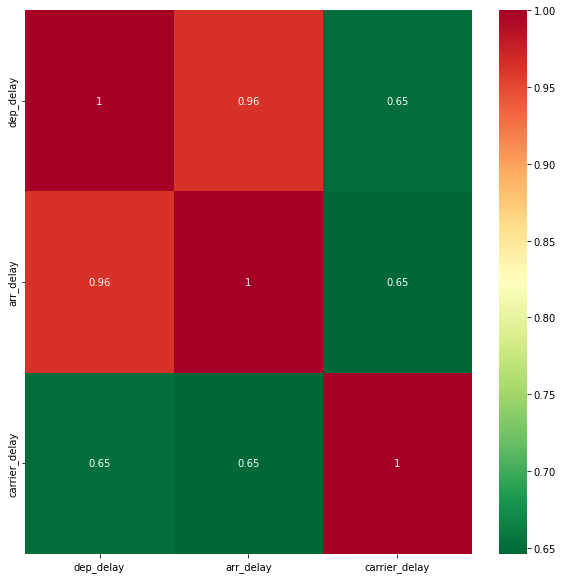

In [17]:
# most correlated features with arr_delay
corrmat = df_f_p_fc.corr()
top_corr_features = corrmat.index[abs(corrmat["arr_delay"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df_f_p_fc[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")


In [13]:
total = df_f_p_fc.isnull().sum().sort_values(ascending=False)
percent = (df_f_p_fc.isnull().sum()/df_f_p_fc.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
total_add_gtime,325023,0.993134
longest_add_gtime,325023,0.993134
first_dep_time,325023,0.993134
cancellation_code,321456,0.982235
late_aircraft_delay,265267,0.810545
security_delay,265267,0.810545
nas_delay,265267,0.810545
weather_delay,265267,0.810545
carrier_delay,265267,0.810545
passengers,53718,0.164140


In [14]:
#Dropping 4 columns containing a lot of missing data
to_drop = missing_data.head(4).index.tolist()
df_f_p_fc.drop(to_drop, axis=1, inplace=True)

In [15]:
df_f_p_fc.columns

Index(['fl_date', 'mkt_unique_carrier', 'mkt_carrier_fl_num',
       'op_unique_carrier', 'op_carrier_fl_num', 'origin', 'dest',
       'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'tempC', 'HeatIndexC', 'DewPointC', 'WindChillC',
       'windspeedMiles', 'WindGustMiles', 'weatherCode', 'precipMM',
       'humidity', 'visibility', 'cloudcover', 'passengers', 'total_gallons',
       'total_cost'],
      dtype='object')

In [ ]:
# 2. for categorical variables:
#df_f_p_fc.dtypes[missing_cols][df_f_p_fc.dtypes[missing_cols] == 'object']
#cat_cols_with_missing = df_f_p_fc.dtypes[missing_cols][df_f_p_fc.dtypes[missing_cols] == 'object'].index.tolist()


In [ ]:
#print(cat_cols_with_missing)

In [20]:
num_feats = df_f_p_fc.dtypes[df_f_p_fc.dtypes != 'object'].index.tolist()

C:\Users\User\anaconda3\envs\midproj_env\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


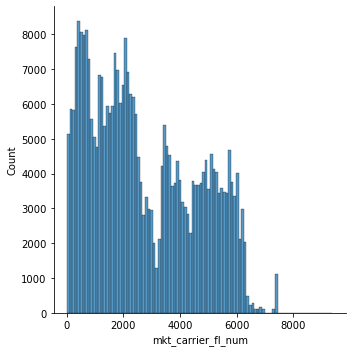

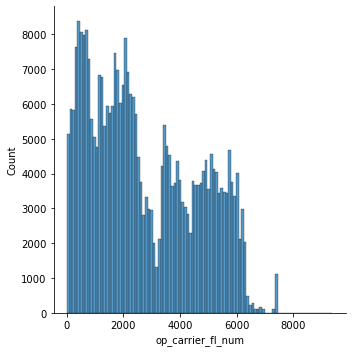

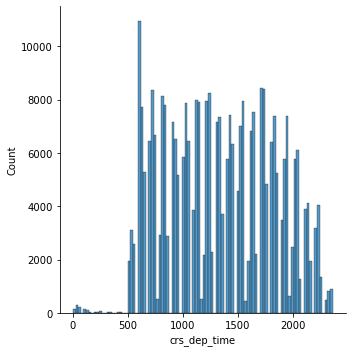

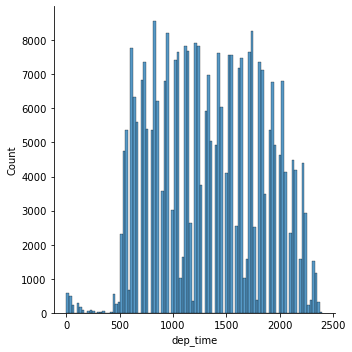

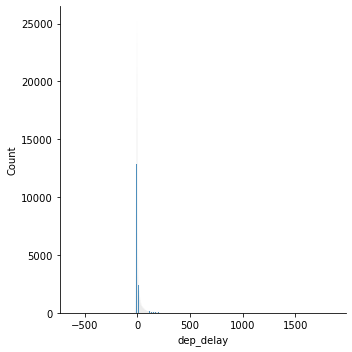

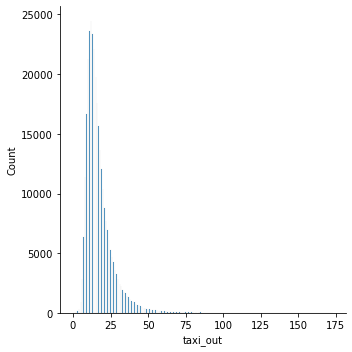

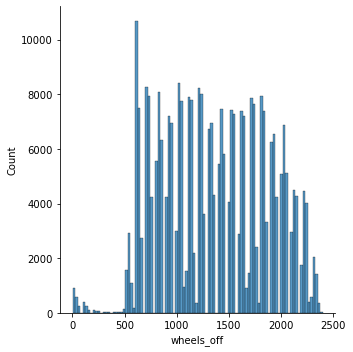

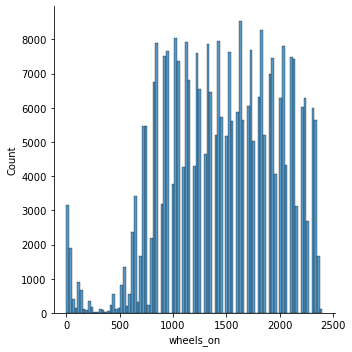

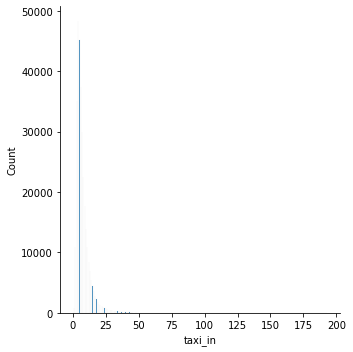

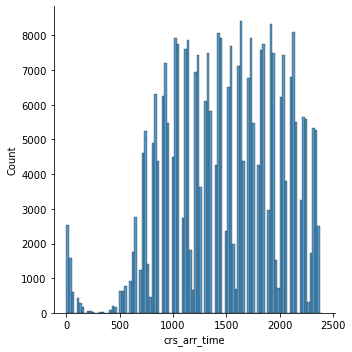

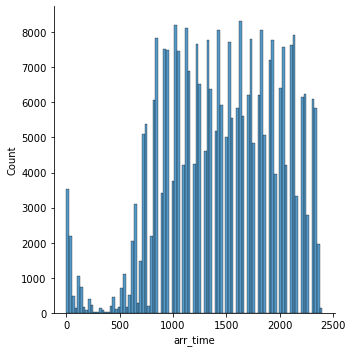

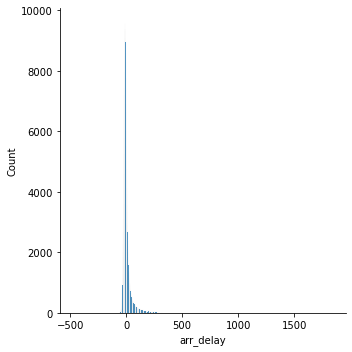

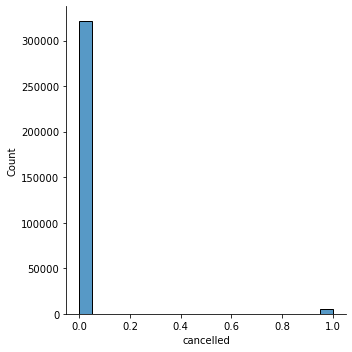

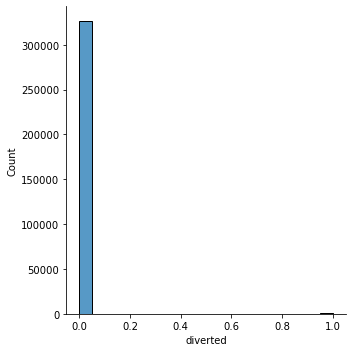

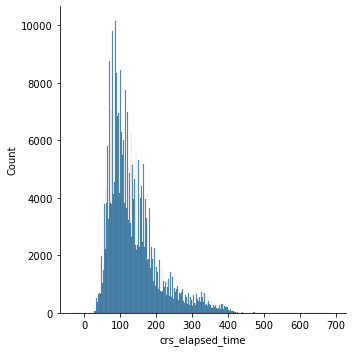

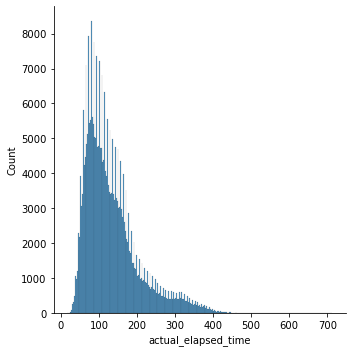

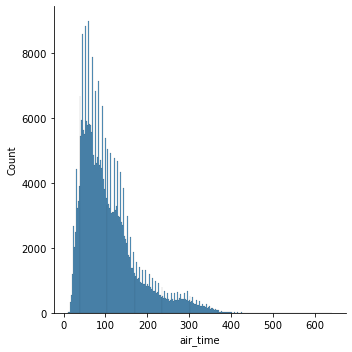

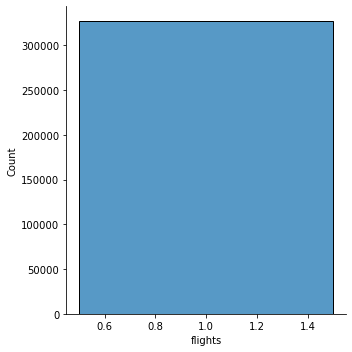

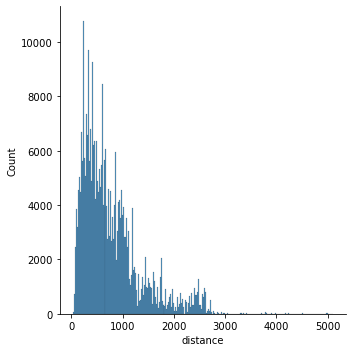

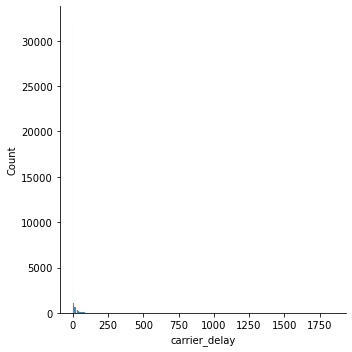

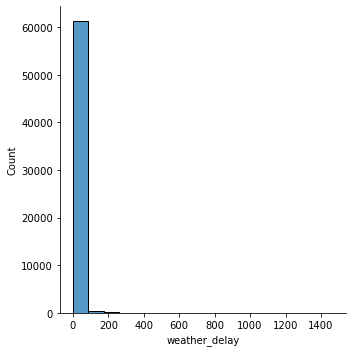

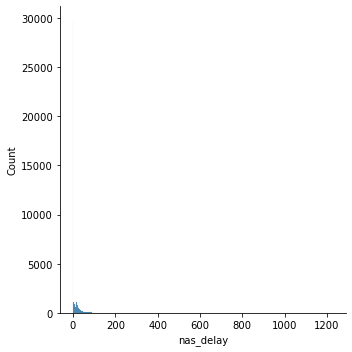

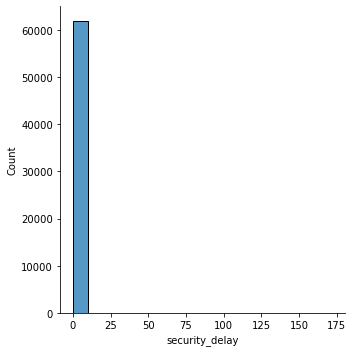

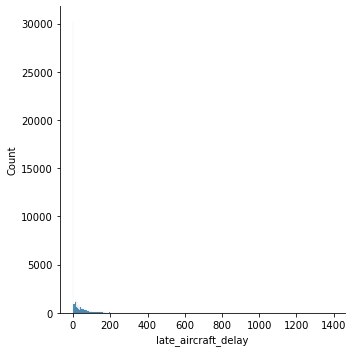

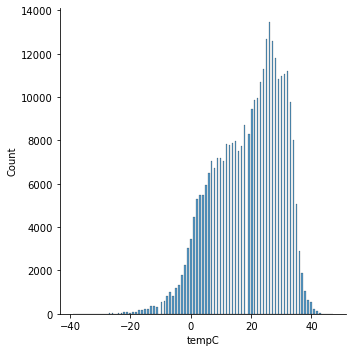

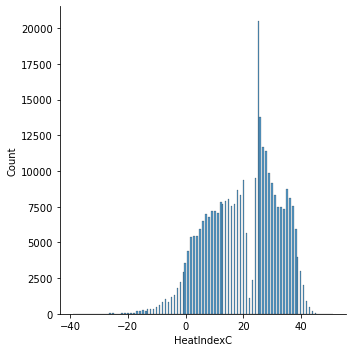

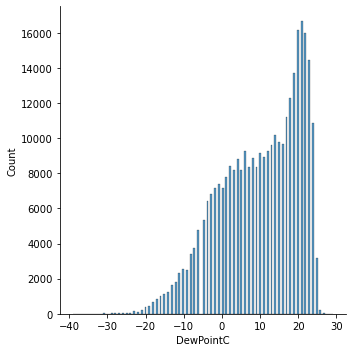

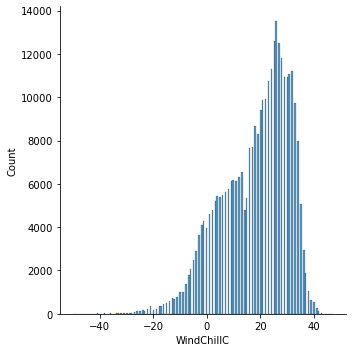

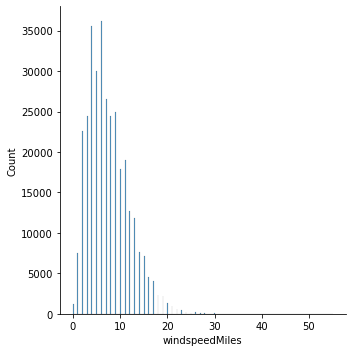

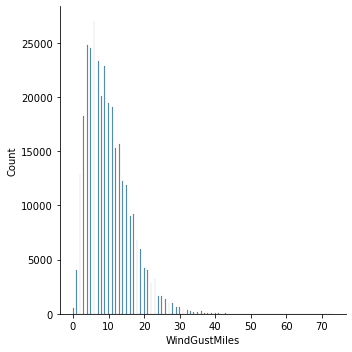

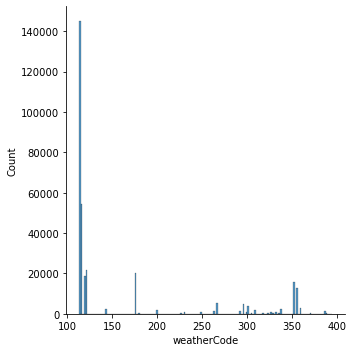

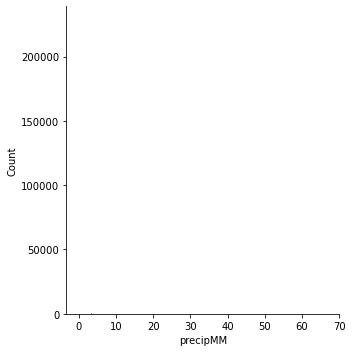

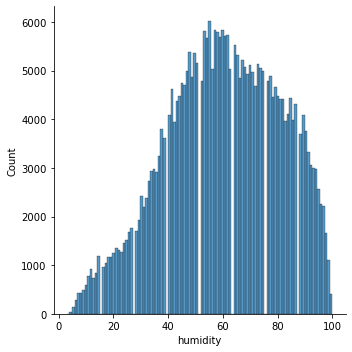

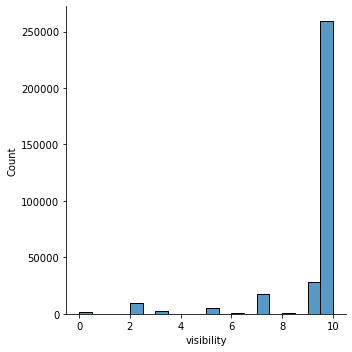

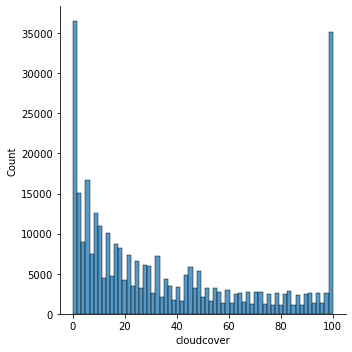

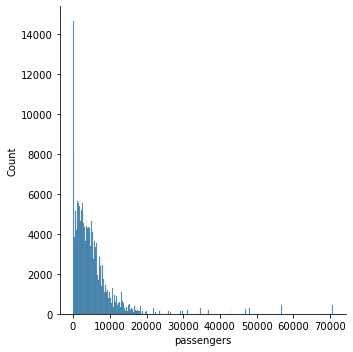

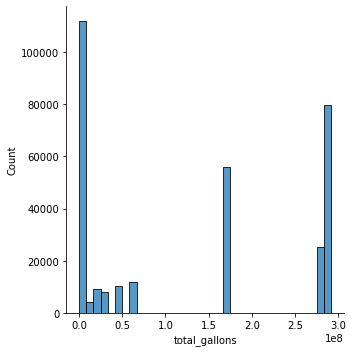

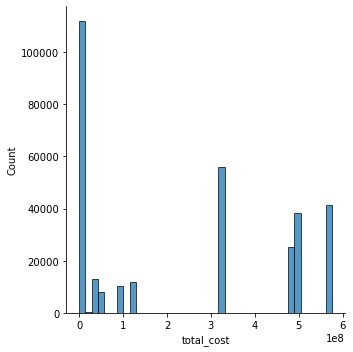

In [21]:
for i in num_feats:
    sns.displot(df_f_p_fc[i])

In [15]:
df_f_p_fc.dup.value_counts() #no variance in dup column; drop it

N    327270
Name: dup, dtype: int64

In [15]:
df_f_p_fc.drop('dup',axis=1,inplace=True)

In [60]:
df_test.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'fl_date', 'mkt_unique_carrier',
       'branded_code_share', 'mkt_carrier', 'mkt_carrier_fl_num',
       'op_unique_carrier', 'tail_num', 'op_carrier_fl_num',
       'origin_airport_id', 'origin', 'origin_city_name', 'dest_airport_id',
       'dest', 'dest_city_name', 'crs_dep_time', 'crs_arr_time', 'dup',
       'crs_elapsed_time', 'flights', 'distance', 'crs_dep_time_rounded',
       'origin_city_name_formatted', 'formatted_datetime', 'Unnamed: 0_y',
       'tempC', 'HeatIndexC', 'DewPointC', 'WindChillC', 'windspeedMiles',
       'WindGustMiles', 'weatherCode', 'precipMM', 'humidity', 'visibility',
       'cloudcover'],
      dtype='object')

In [ ]:
df_f_p_fc.columns

### Predict dep_delay and carrier_delay

THe predicted (grouped) values of dep_delay and carrier_delay will be used in both the train and test data.

In [16]:
#Taking the dep_hour
import datetime as dt

df_f_p_fc['dep_hour']=pd.to_datetime(df_f_p_fc['crs_dep_time'], format='%H%M',errors='coerce').dt.hour
df_f_p_fc['dep_hour']=df_f_p_fc['dep_hour'][~df_f_p_fc['dep_hour'].isnull()].astype(int)

In [17]:
df_test['dep_hour']=pd.to_datetime(df_test['crs_dep_time'], format='%H%M',errors='coerce').dt.hour
df_test['dep_hour']=df_test['dep_hour'][~df_test['dep_hour'].isnull()].astype(int)

In [18]:
#Grouping by op_unique_carrier, origin, dest, crs_dep_hour
df_f_mean=df_f_p_fc[['op_unique_carrier','origin','dest','dep_hour','dep_delay','carrier_delay']].groupby(['origin','dest','op_unique_carrier','dep_hour'],as_index=False).mean()

In [ ]:
df_f_mean.head()

In [31]:
X=df_f_p_fc.copy()

In [32]:
#Dropping all columns in X that are not in flights_test table
X.drop(columns= [x for x in X.columns if x not in df_test.columns],inplace=True)

In [21]:
df_test.drop(['Unnamed: 0', 'Unnamed: 0_x','branded_code_share', 'mkt_carrier','tail_num','origin_airport_id',\
              'origin_city_name', 'dest_airport_id','dest_city_name','dup',\
             'crs_dep_time_rounded','origin_city_name_formatted', 'formatted_datetime', 'Unnamed: 0_y'],axis=1,inplace=True)

The following transform steps will be completed for both train and test to get X and y.

In [33]:
#Transform steps; merging passengers and fuel again, since they were deleted earlier after EDA
X_p=pd.merge(left=X,right=df_p_mean,how='left',on=['mkt_unique_carrier','origin','dest'],)
X_p_fc=pd.merge(left=X_p,right=df_fc_mean,how='left',on='op_unique_carrier')
X_p_fc['dep_hour']=pd.to_datetime(X_p_fc['crs_dep_time'], format='%H%M',errors='coerce').dt.hour
X_p_fc['dep_hour']=X_p_fc['dep_hour'][~X_p_fc['dep_hour'].isnull()].astype(int)
X=pd.merge(left=X_p_fc,right=df_f_mean,how='left',on=['origin','dest','op_unique_carrier','dep_hour'])

In [73]:
#Transform steps; merging passengers and fuel again, since they were deleted earlier after EDA
test_p=pd.merge(left=df_test,right=df_p_mean,how='left',on=['mkt_unique_carrier','origin','dest'],)
test_p_fc=pd.merge(left=test_p,right=df_fc_mean,how='left',on='op_unique_carrier')
test_p_fc['dep_hour']=pd.to_datetime(test_p_fc['crs_dep_time'], format='%H%M',errors='coerce').dt.hour
test_p_fc['dep_hour']=test_p_fc['dep_hour'][~test_p_fc['dep_hour'].isnull()].astype(int)
X_final_test=pd.merge(left=test_p_fc,right=df_f_mean,how='left',on=['origin','dest','op_unique_carrier','dep_hour'])

In [34]:
#Transform steps; adding flight arr_hour infor. 
X['arr_hour']=pd.to_datetime(X['crs_arr_time'], format='%H%M',errors='coerce').dt.hour
X['arr_hour']=X['arr_hour'][~X['arr_hour'].isnull()].astype(int)

In [74]:
X_final_test['arr_hour']=pd.to_datetime(X_final_test['crs_arr_time'], format='%H%M',errors='coerce').dt.hour
X_final_test['arr_hour']=X_final_test['arr_hour'][~X_final_test['arr_hour'].isnull()].astype(int)

In [35]:
#Transform steps
X.drop(['fl_date','mkt_carrier_fl_num','op_carrier_fl_num','dest','crs_dep_time','crs_arr_time'],axis=1,inplace=True)

In [75]:
X_final_test.drop(['fl_date','mkt_carrier_fl_num','op_carrier_fl_num','dest','crs_dep_time','crs_arr_time'],axis=1,inplace=True)

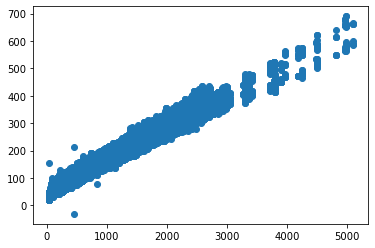

In [32]:
plt.scatter(X.distance,X.crs_elapsed_time) #distance and time are highly correlated, we can drop 1

In [36]:
#Transform steps
X.drop(['op_unique_carrier','distance'],axis=1,inplace=True)

In [76]:
X_final_test.drop(['op_unique_carrier','distance'],axis=1,inplace=True)

In [37]:
X_catfeats=X[['mkt_unique_carrier', 'origin']] # keeping the cat_feats separate; if we require we can merge later on
X.drop(['mkt_unique_carrier', 'origin'],axis=1,inplace=True)

In [77]:
X_catfeats_test=X_final_test[['mkt_unique_carrier', 'origin']] # keeping the cat_feats separate; if we require we can merge later on

X_final_test.drop(['mkt_unique_carrier', 'origin'],axis=1,inplace=True)

In [38]:
#Imputing missing values
# missing values are imputed by min for delays because it is assumed that if a delay is missing it did not occur.
X["carrier_delay"] = X["carrier_delay"].fillna(X["carrier_delay"].mean())
X["passengers"] = X["passengers"].fillna(X["passengers"].mean())
X['total_cost']=X["total_cost"].fillna(X["total_cost"].mean())
X['total_gallons']=X["total_gallons"].fillna(X["total_gallons"].mean())
X['arr_hour']=X["arr_hour"].fillna(X["arr_hour"].mean())
X['dep_hour']=X["dep_hour"].fillna(X["dep_hour"].mean())
X['dep_delay']=X["dep_delay"].fillna(X["dep_delay"].mean())

In [78]:
X_final_test["carrier_delay"] = X_final_test["carrier_delay"].fillna(X_final_test["carrier_delay"].mean())
X_final_test["passengers"] = X_final_test["passengers"].fillna(X_final_test["passengers"].mean())
X_final_test['total_cost']=X_final_test["total_cost"].fillna(X_final_test["total_cost"].mean())
X_final_test['total_gallons']=X_final_test["total_gallons"].fillna(X_final_test["total_gallons"].mean())
X_final_test['arr_hour']=X_final_test["arr_hour"].fillna(X_final_test["arr_hour"].mean())
X_final_test['dep_hour']=X_final_test["dep_hour"].fillna(X_final_test["dep_hour"].mean())
X_final_test['dep_delay']=X_final_test["dep_delay"].fillna(X_final_test["dep_delay"].mean())

In [28]:
#X['arr_delay']=df_f_p_fc['arr_delay'] # adding the arr_delay (for scaling)

In [29]:
#X.arr_delay.value_counts(dropna=False)

-11.0      9590
-10.0      9543
-9.0       9383
-12.0      9382
-8.0       9332
           ... 
 499.0        1
 1370.0       1
 962.0        1
 644.0        1
 448.0        1
Name: arr_delay, Length: 874, dtype: int64

In [39]:
features=X.columns #keeping the column names to add after scaling
features

Index(['crs_elapsed_time', 'flights', 'tempC', 'HeatIndexC', 'DewPointC',
       'WindChillC', 'windspeedMiles', 'WindGustMiles', 'weatherCode',
       'precipMM', 'humidity', 'visibility', 'cloudcover', 'dep_hour',
       'passengers', 'total_gallons', 'total_cost', 'dep_delay',
       'carrier_delay', 'arr_hour'],
      dtype='object')

In [79]:
features_t=X_final_test.columns

In [80]:
features_t

Index(['crs_elapsed_time', 'flights', 'tempC', 'HeatIndexC', 'DewPointC',
       'WindChillC', 'windspeedMiles', 'WindGustMiles', 'weatherCode',
       'precipMM', 'humidity', 'visibility', 'cloudcover', 'dep_hour',
       'passengers', 'total_gallons', 'total_cost', 'dep_delay',
       'carrier_delay', 'arr_hour'],
      dtype='object')

In [40]:
#Scaling
from sklearn.preprocessing import StandardScaler
# 
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [81]:
scaler = StandardScaler()
X_final_test = pd.DataFrame(scaler.fit_transform(X_final_test))

In [41]:
X.columns=features

In [82]:
X_final_test.columns=features_t
X_final_test.columns

Index(['crs_elapsed_time', 'flights', 'tempC', 'HeatIndexC', 'DewPointC',
       'WindChillC', 'windspeedMiles', 'WindGustMiles', 'weatherCode',
       'precipMM', 'humidity', 'visibility', 'cloudcover', 'dep_hour',
       'passengers', 'total_gallons', 'total_cost', 'dep_delay',
       'carrier_delay', 'arr_hour'],
      dtype='object')

In [42]:
X.columns

Index(['crs_elapsed_time', 'flights', 'tempC', 'HeatIndexC', 'DewPointC',
       'WindChillC', 'windspeedMiles', 'WindGustMiles', 'weatherCode',
       'precipMM', 'humidity', 'visibility', 'cloudcover', 'dep_hour',
       'passengers', 'total_gallons', 'total_cost', 'dep_delay',
       'carrier_delay', 'arr_hour'],
      dtype='object')

In [77]:
#Transfrom steps
#df_dummy = pd.get_dummies(X_catfeats,drop_first=True)

In [78]:
#Transform step
#X=pd.concat([X, df_dummy], axis=1)

In [43]:
y=df_f_p_fc.arr_delay #y

In [44]:
y=y.fillna(y.median()) #impute missing in y

In [33]:
#X.drop('arr_delay',axis=1,inplace=True)

In [45]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.75,test_size=0.25, random_state=101)

In [46]:
X_train.shape

(245452, 20)

In [47]:
X_test.shape

(81818, 20)

### Ridge, Lasso Regression

In [46]:
# import numpy
import numpy as np

# import linear_model and datasets from sklearn
from sklearn import linear_model, datasets

# import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
from sklearn.linear_model import Ridge,Lasso

In [49]:
ridge = Ridge()


In [50]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

gridridge = GridSearchCV(estimator=ridge,param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = gridridge.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.2378478801426364
Best Params:  {'alpha': 10}


In [51]:
pred_y=gridridge.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
print(np.sqrt(mean_squared_error(y_test,pred_y))) #RMSE

44.43166955007168


In [54]:
gridridge.score(X_test,y_test)

0.24447009938897346

In [55]:
regressor = Lasso()

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

grid = GridSearchCV(estimator=regressor,param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
print('Best Score: ', grid.best_score_)
print('Best Params: ', grid.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.237848096180549
Best Params:  {'alpha': 0.001}


C:\Users\User\anaconda3\envs\midproj_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.723e+06, tolerance: 6.077e+04
  model = cd_fast.enet_coordinate_descent(


In [56]:
pred_y_lasso=grid.predict(X_test)

In [57]:
print(np.sqrt(mean_squared_error(y_test,pred_y_lasso))) #RMSE

44.43162715398505


In [58]:
grid.score(X_test,y_test)

0.24447154122071924

In [83]:
ridge = Ridge()


In [87]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

gridridge = GridSearchCV(estimator=ridge,param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1,)
grid_result = gridridge.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.2378478801426364
Best Params:  {'alpha': 10}


In [88]:

preds = gridridge.predict(X_final_test)

In [89]:
np.savetxt('test2.txt', preds, fmt='%d')

### Random Forest Regressor

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
clf = RandomForestRegressor(n_estimators=300, random_state=0,min_samples_leaf=100,)
clf.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=100, n_estimators=300, random_state=0)

In [61]:
clf.score(X_train,y_train)

0.2671706604660161

In [62]:
clf.predict(X_test)

array([-2.70194646,  0.45925785, -0.48567203, ..., -9.59039708,
       -3.00582677, -1.46433097])

In [63]:
clf.score(X_test,y_test) #Some overfitting here

0.22586419152229287

In [64]:
print(np.sqrt(mean_squared_error(y_test,clf.predict(X_test)))) #RMSE

44.97543603829809


In [65]:
feature_importance= pd.Series(clf.feature_importances_, index= X_train.columns).sort_values(ascending=False)
feature_importance


dep_delay           0.850745
carrier_delay       0.021531
precipMM            0.014565
crs_elapsed_time    0.013751
cloudcover          0.012461
DewPointC           0.012435
humidity            0.011772
weatherCode         0.010502
passengers          0.008023
WindGustMiles       0.006604
windspeedMiles      0.006029
WindChillC          0.005406
dep_hour            0.005060
HeatIndexC          0.004904
arr_hour            0.004555
total_cost          0.003995
tempC               0.003342
total_gallons       0.003133
visibility          0.001187
flights             0.000000
dtype: float64

#### Decision Tree (not useful)

In [91]:
from sklearn.tree import DecisionTreeRegressor

In [92]:
from sklearn import metrics

In [142]:
# Create Decision Tree classifer object
clf = DecisionTreeRegressor()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [146]:
print("Accuracy:",clf.score(X_test, y_test))

Accuracy: -0.9583597691348644


### XGBoost

In [66]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [67]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [95]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 7, alpha = 0.1,)

In [96]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [97]:
xg_reg.score(X_train,y_train) # some overfitting

0.20588765687372723

In [98]:
xg_reg.score(X_test,y_test)

0.11096437987323315

In [99]:
print(np.sqrt(mean_squared_error(y_test,preds))) #better RMSE

1.6057497370824108


In [38]:
xg_reg1 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 0.1,)

In [39]:
xg_reg1.fit(X_train,y_train)

preds1 = xg_reg1.predict(X_test)

In [40]:
xg_reg1.score(X_train,y_train) # still some overfitting

0.15093837661173826

In [41]:
xg_reg1.score(X_test,y_test)

0.10814799924545182

In [44]:
print(np.sqrt(mean_squared_error(y_test,preds1))) #lower RMSE

1.6082911574578003


### XGBoost with Cross Validation

In [100]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 7, 'alpha': 1}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [101]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.779114,0.003033,1.779512,0.027667
1,1.751297,0.006903,1.752924,0.030626
2,1.726970,0.008130,1.730279,0.029962
3,1.706268,0.010303,1.711008,0.032306
4,1.691294,0.012244,1.697199,0.031866
5,1.676638,0.011786,1.684038,0.031916
6,1.666840,0.011861,1.675191,0.032320
7,1.655557,0.013703,1.664747,0.034010
8,1.645234,0.014178,1.655617,0.036671
9,1.635619,0.013391,1.647339,0.036083


In [102]:
print((cv_results["test-rmse-mean"]).tail(1)) #RMSE

49    1.573205
Name: test-rmse-mean, dtype: float64


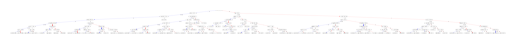

In [103]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()
plt.savefig('xgboost.png')

<Figure size 1500x1000 with 0 Axes>

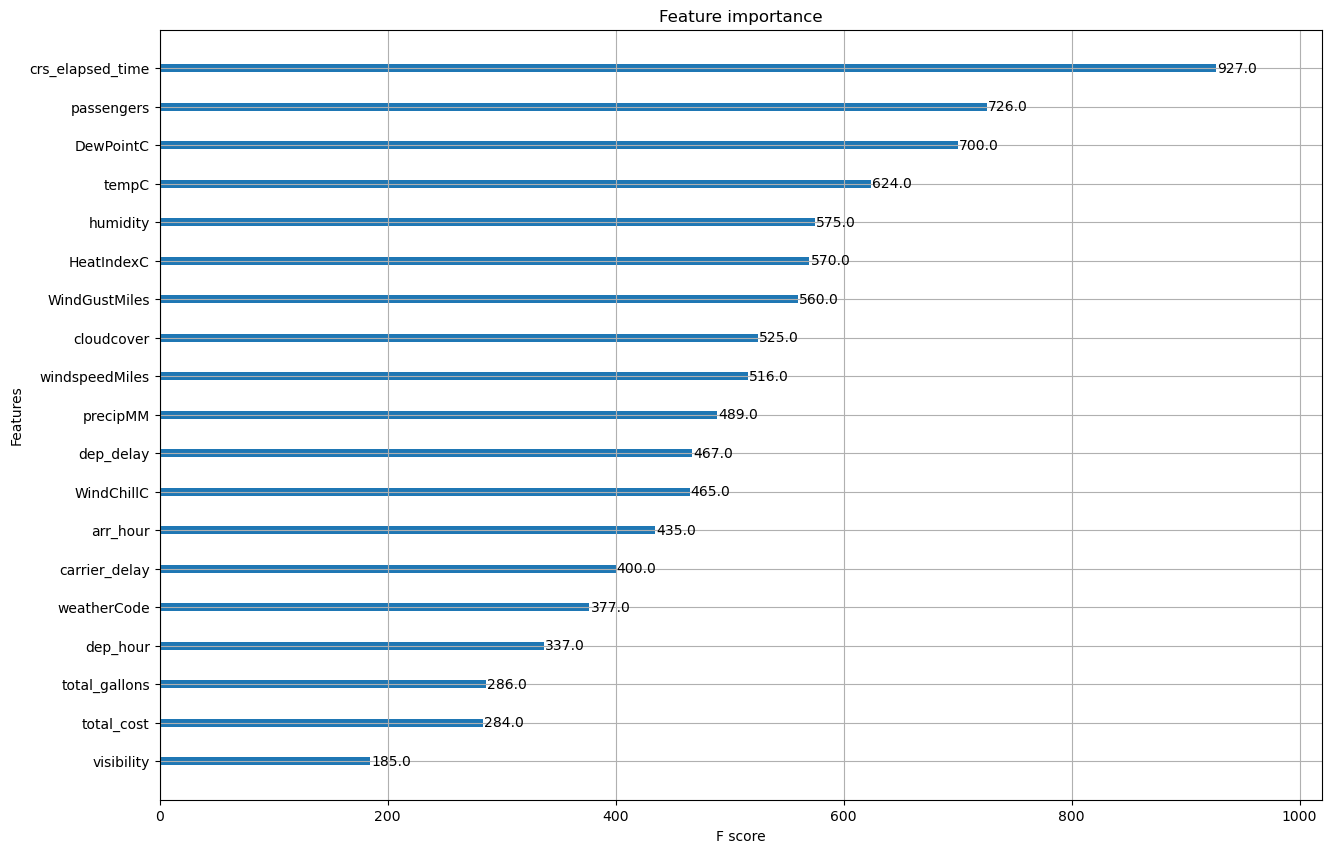

In [104]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()
plt.savefig('xgboost_imp_features.png')


In [45]:
params1 = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results1 = xgb.cv(dtrain=data_dmatrix, params=params1, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[12:08:30] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:30] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[12:08:30] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [46]:
cv_results1

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.779749,0.005357,1.780041,0.010721
1,1.746716,0.010793,1.747929,0.005820
2,1.723487,0.004174,1.725180,0.011865
3,1.708550,0.004015,1.710497,0.012119
4,1.691799,0.009678,1.694007,0.009046
5,1.676759,0.010372,1.679343,0.006235
6,1.667427,0.009306,1.670450,0.006941
7,1.655503,0.004331,1.659038,0.011808
8,1.642581,0.008103,1.646520,0.007777
9,1.634972,0.011463,1.639216,0.005082


In [47]:
print((cv_results1["test-rmse-mean"]).tail(1)) #

49    1.581142
Name: test-rmse-mean, dtype: float64


In [48]:
params2 = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 1}

cv_results2 = xgb.cv(dtrain=data_dmatrix, params=params2, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[12:10:36] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:37] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:38] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:38] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:39] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:39] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:41] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objecti

In [49]:
cv_results2

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.779776,0.003019,1.779824,0.027608
1,1.752904,0.006733,1.753515,0.030699
2,1.729568,0.007972,1.731028,0.030059
3,1.709862,0.009901,1.711941,0.032524
4,1.695741,0.011735,1.698329,0.032193
5,1.682080,0.011400,1.685273,0.032297
6,1.673123,0.011436,1.676671,0.032691
7,1.662541,0.013244,1.666388,0.034441
8,1.653059,0.013631,1.657300,0.037014
9,1.644322,0.012885,1.648852,0.036321


In [50]:
print((cv_results2["test-rmse-mean"]).tail(1)) #

49    1.575028
Name: test-rmse-mean, dtype: float64


In [51]:
params3 = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 7, 'alpha': 1}

cv_results3 = xgb.cv(dtrain=data_dmatrix, params=params3, nfold=10,
                    num_boost_round=70,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [52]:
cv_results3.tail(15)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
55,1.525482,0.004222,1.571550,0.028602
56,1.524698,0.004148,1.571302,0.028585
57,1.524048,0.004000,1.571069,0.028643
58,1.523188,0.003998,1.570803,0.028674
59,1.522291,0.003989,1.570652,0.028805
60,1.521438,0.004117,1.570439,0.028714
61,1.520857,0.004185,1.570244,0.028884
62,1.519918,0.004131,1.569969,0.028595
63,1.518823,0.003991,1.569707,0.028572
64,1.518071,0.004142,1.569577,0.028641


In [53]:
print((cv_results3["test-rmse-mean"]).tail(1)) #lowest rmse

69    1.569073
Name: test-rmse-mean, dtype: float64


In [68]:
xg_reg_ = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 7, alpha = 1)

In [69]:
xg_reg_.fit(X_train,y_train)

preds = xg_reg_.predict(X_test)

In [70]:
xg_reg_.score(X_train,y_train) # still some overfitting

0.3788257133685421

In [71]:
xg_reg_.score(X_test,y_test)

0.21641903529045226

In [72]:
print(np.sqrt(mean_squared_error(y_test,preds))) #lower RMSE

45.2489746888444


### Predicting final test

In [74]:
xg_reg_final = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 7, alpha = 1)

In [75]:
xg_reg_final.fit(X_train,y_train)

preds = xg_reg_final.predict(X_final_test)

In [77]:
np.savetxt('test1.txt', preds, fmt='%d')

In [54]:
params4 = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 3, 'alpha': 1}

cv_results4 = xgb.cv(dtrain=data_dmatrix, params=params4, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [55]:
cv_results4.tail(15)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
35,1.585680,0.009154,1.589859,0.031765
36,1.585441,0.009123,1.589646,0.031720
37,1.583762,0.007663,1.588106,0.030975
38,1.583540,0.007653,1.587920,0.030923
39,1.582402,0.007658,1.586803,0.030571
40,1.581705,0.006789,1.586222,0.030300
41,1.580763,0.006322,1.585375,0.029751
42,1.580102,0.005930,1.584853,0.029580
43,1.579268,0.005993,1.584094,0.029140
44,1.577856,0.005252,1.582722,0.029029


In [56]:
print((cv_results4["test-rmse-mean"]).tail(1)) #

49    1.580379
Name: test-rmse-mean, dtype: float64


In [ ]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


### SVM

In [105]:
parameter_candidates = {'C': [1, 10, 100, 1000]}   



In [106]:
from sklearn import svm

# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=svm.LinearSVR(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf.fit(X_train, y_train)   

C:\Users\User\anaconda3\envs\midproj_env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(estimator=LinearSVR(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000]})

In [107]:
print('Best score for data1:', clf.best_score_) 

Best score for data1: 0.09216526070856082


In [108]:
# View the best parameters for the model found using grid search
print('Best C:',clf.best_estimator_.C) 

Best C: 1


In [109]:
param_grid=[{'C':[1,10,100,1000], 'kernel':['linear']}]
            

In [ ]:
from sklearn import svm
reg = GridSearchCV(estimator=svm.SVR(), param_grid=param_grid, n_jobs=-1)

# Train the classifier on data1's feature and target data
reg.fit(X_train, y_train)  

In [ ]:
param_grid={'C':[1,10,100,1000], 'degree':[2,3],'gamma':[0.001,0.0001],'kernel':['poly']}
            

In [ ]:
from sklearn import svm
reg = GridSearchCV(estimator=svm.SVR(), param_grid=param_grid, n_jobs=-1)

# Train the classifier on data1's feature and target data
reg.fit(X_train, y_train)  

In [ ]:
param_grid={'C':[1,10,100,1000], 'gamma':[0.001,0.0001],'kernel':['rbf','sigmoid']}

In [ ]:
from sklearn import svm
reg = GridSearchCV(estimator=svm.SVR(), param_grid=param_grid, n_jobs=-1)

# Train the classifier on data1's feature and target data
reg.fit(X_train, y_train)  